# 🔬 DNA Profiling Data Analysis: Identifying Missing Children

## Project Overview
DNA profiling is a powerful forensic technique used to identify missing persons by analyzing their genetic markers. This project aims to explore real-world DNA datasets, analyze DNA matching patterns, and derive meaningful insights that can help in the identification of missing children.


 ## Goals of the Project
1. **Understand the DNA dataset** – Learn about STR values and match scores.
2. **Analyze parent-child DNA matching patterns** – How many markers typically match?
3. **Identify key trends in missing children cases** – Age, gender, and region-wise analysis.
4. **Explore statistical insights** – What percentage of missing children get identified?
5. **Create meaningful visualizations** – Graphical representations for clarity.

## What Questions Will This Project Answer?
✔ What does a typical DNA profile look like?  
✔ How is DNA matching done between parents and children?  
✔ What are the key patterns in successful vs. unsuccessful identifications?  
✔ What trends exist in the demographics of missing children?  

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Setting visualization style
sns.set_style("whitegrid")

In [5]:
# Display all columns of the dataset
pd.set_option("display.max_columns", None)

In [6]:
print("Libraries imported successfully!")

Libraries imported successfully!


## Generate and Save the Synthetic Dataset
Since real DNA data is sensitive, we are using a synthetic dataset that mimics real-world DNA profiling. 
The dataset includes:
- **ID:** Unique identifier for each individual  
- **Gender & Age:** Basic demographic information  
- **Region:** Geographic area of residence  
- **Parent_ID:** Known parent-child relationships (if available)  
- **Match_Score:** Percentage similarity in DNA matching  
- **STR Markers (STR_1 to STR_5):** Genetic markers used for identification  

In [8]:
# Generate and Save the Dataset
np.random.seed(42)

num_samples = 100
ids = [f"IND{i+1:03d}" for i in range(num_samples)]
str_markers = {f"STR_{i}": np.random.randint(5, 20, num_samples) for i in range(1, 6)}
gender = np.random.choice(["Male", "Female"], num_samples)
age = np.random.randint(1, 18, num_samples)
regions = np.random.choice(["North", "South", "East", "West"], num_samples)
parent_ids = [np.random.choice(ids) if np.random.rand() > 0.5 else "Unknown" for _ in range(num_samples)]
match_scores = np.random.uniform(50, 99, num_samples)
status = np.random.choice(["Identified", "Unidentified"], num_samples, p=[0.6, 0.4])

df = pd.DataFrame({
    "ID": ids, "Gender": gender, "Age": age, "Region": regions,
    "Parent_ID": parent_ids, "Match_Score": match_scores, "Status": status
}).assign(**str_markers)

# Save dataset as CSV
df.to_csv("DNA_Profiling_Data.csv", index=False)

## Load the Dataset
Now, we will load our dataset from the CSV file and preview its structure.

In [9]:
# Load the dataset
df = pd.read_csv("DNA_Profiling_Data.csv")

# Display first five rows
df.head()

,ID,Gender,Age,Region,Parent_ID,Match_Score,Status,STR_1,STR_2,STR_3,STR_4,STR_5
0,IND001,Female,8,North,IND045,52.002562,Identified,11,6,9,15,5
1,IND002,Male,13,East,IND061,58.277818,Identified,8,14,11,5,18
2,IND003,Female,1,West,Unknown,63.650927,Identified,17,18,11,19,9
3,IND004,Male,16,North,Unknown,58.673514,Identified,19,8,17,10,8
4,IND005,Female,7,East,IND036,54.346424,Identified,15,18,19,12,12


## Understanding & Cleaning the Data 
Before we begin the analysis, we need to explore and clean the dataset.  
This step ensures that our data is accurate, complete, and ready for processing.  
We will:  
- Check for missing values  
- Check for duplicate records  
- Get an overview of data types and summary statistics  

In [11]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values only
missing_values[missing_values > 0]

Series([], dtype: int64)

In [12]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Display the number of duplicates
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [13]:
# Get summary statistics for numeric columns
df.describe()

,Age,Match_Score,STR_1,STR_2,STR_3,STR_4,STR_5
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000
mean,8.980000,70.932003,12.270000,12.630000,11.780000,10.980000,11.570
std,5.268508,13.236411,4.251809,4.403064,4.298414,4.201924,4.571
min,1.000000,50.983489,5.000000,5.000000,5.000000,5.000000,5.000
25%,4.000000,59.159304,8.750000,9.000000,8.000000,7.000000,7.000
50%,9.000000,68.320029,12.000000,13.000000,12.000000,11.000000,11.000
75%,13.000000,80.013908,16.000000,16.000000,16.000000,14.250000,16.000
max,17.000000,98.339247,19.000000,19.000000,19.000000,19.000000,19.000


In [14]:
# Check data types of each column
df.dtypes

ID              object
Gender          object
Age              int64
Region          object
Parent_ID       object
Match_Score    float64
Status          object
STR_1            int64
STR_2            int64
STR_3            int64
STR_4            int64
STR_5            int64
dtype: object

## Exploratory Data Analysis (EDA) 
Exploratory Data Analysis helps us understand the dataset by visualizing key patterns and trends.  
We will analyze:  
- Gender distribution  
- Age distribution  
- Status (Identified vs. Unidentified) distribution  
- Region-wise missing children count  
- DNA match score distribution  

## Gender Distribution Analysis  
To understand the demographic composition of our dataset, we analyze the distribution of gender. A clear visualization helps identify any imbalances, which could be important for further analysis. The bar chart below represents the count of male and female individuals in the dataset.  

C:\Users\Owner\AppData\Local\Temp\ipykernel_3796\1764728578.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Gender"], hue=None, palette="Set2", legend=False)


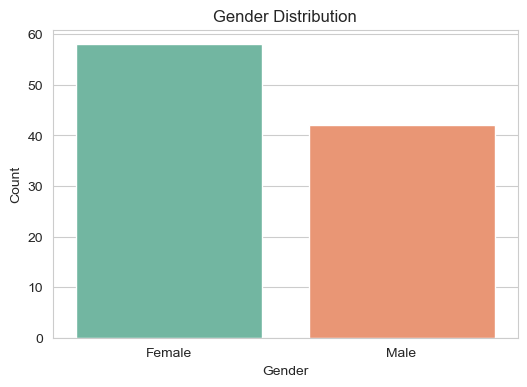

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df["Gender"], hue=None, palette="Set2", legend=False)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### Insights  
The bar chart reveals that the dataset contains a slightly higher number of **female** individuals compared to **male** individuals. Specifically:  
- **Female count:** Approximately **60**  
- **Male count:** Approximately **45**  

This distribution suggests a minor gender imbalance, but it remains relatively balanced for further analysis. If gender is a key factor in our study, we may need to consider this distribution while interpreting results.  

## Age Distribution of Missing Children
This section analyzes the **age distribution of missing children** to identify which age groups are most vulnerable. Understanding these patterns can help in prioritizing search efforts and preventive measures.

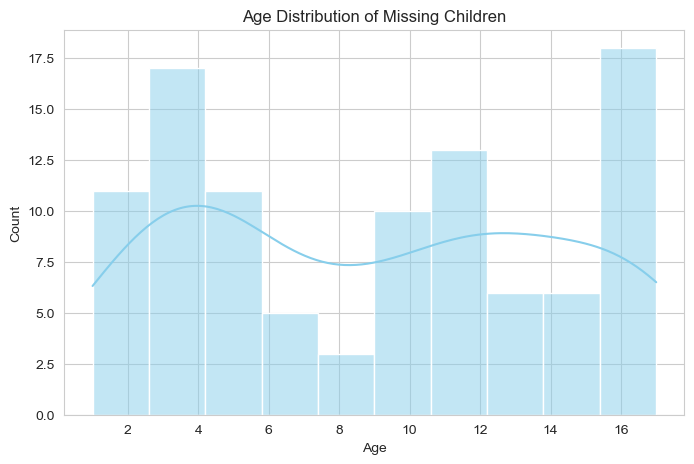

In [22]:
# Histogram for Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=10, kde=True, color="skyblue")
plt.title("Age Distribution of Missing Children")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Insights  

- **High Vulnerability at Young and Teenage Ages:**  
  - The highest number of missing children is seen in the **4-5 years** and **16-year-old** age groups, with peaks around **17-18 cases**.  
  - This suggests that **preschool-aged children** and **older teenagers** are more susceptible to getting lost or abducted.  

- **Fluctuating Trend Across Age Groups:**  
  - There is a noticeable **dip in missing cases around ages 6-8**, possibly due to better supervision.  
  - The numbers **rise again around ages 10-12**, likely due to increasing independence.

- **Trend Representation:**  
  - The KDE (Kernel Density Estimation) curve provides a **smooth trend** overlaid on the histogram, highlighting two peaks at **2-5 years** and **14-16 years**.

## Identified vs Unidentified Children
This section examines the proportion of **identified vs. unidentified missing children**. Understanding these statistics is crucial for evaluating the effectiveness of identification efforts and determining the number of unresolved cases.

C:\Users\Owner\AppData\Local\Temp\ipykernel_3796\2906037321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Status"], palette="coolwarm")


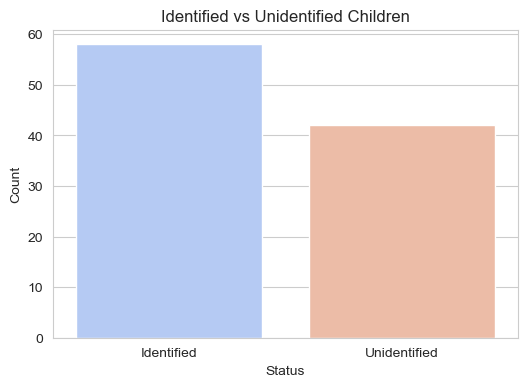

In [19]:
# Countplot for Identification Status
plt.figure(figsize=(6,4))
sns.countplot(x=df["Status"], palette="coolwarm")
plt.title("Identified vs Unidentified Children")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

### Insights  

- **Higher Number of Identified Cases:**  
  - The chart shows that more missing children have been **identified** compared to **unidentified cases**.  
  - However, a **significant number** of children are still unidentified, which calls for better data collection and identification methods.

- **Need for Improved Identification Efforts:**  
  - The **gap between identified and unidentified cases** suggests that identification techniques (such as DNA profiling, facial recognition, and public awareness) play a crucial role in solving missing cases.
  - Future initiatives can focus on enhancing **tracking systems** to lower the number of unidentified cases.

- **Visual Representation:**  
  - The **color contrast** in the count plot clearly differentiates between the two groups.
  - This insight helps authorities and researchers focus on **improving record-keeping** and **forensic identification techniques** to **reduce unidentified cases**.

## Missing Children Distribution by Region
This section explores the **geographical distribution** of missing children across different regions. Analyzing this data helps in identifying **regional patterns** and understanding which areas require **more intervention and resources**.

C:\Users\Owner\AppData\Local\Temp\ipykernel_3796\2950573271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Region"], palette="pastel")


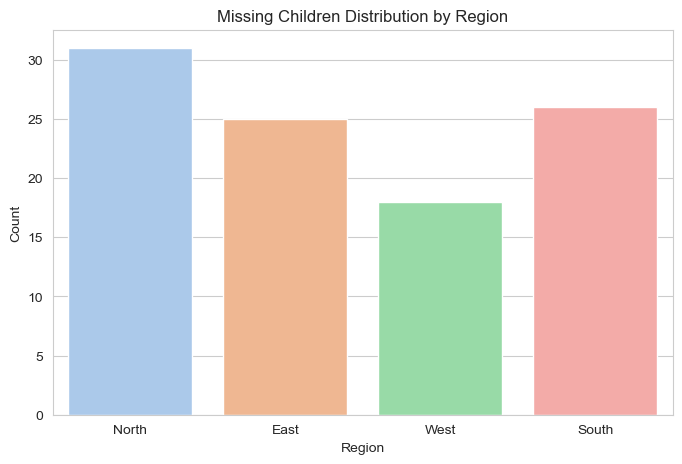

In [25]:
# Countplot for Region Distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df["Region"], palette="pastel")
plt.title("Missing Children Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

### Insights  

- **Highest Number of Missing Cases in the North:**  
  - The **North region** has the highest number of missing children cases, indicating a potential need for **enhanced security measures, awareness programs, and investigation resources** in that area.

- **Relatively Lower Cases in the West:**  
  - The **West region** has the lowest count, suggesting that this area might have **better tracking systems or lower incidents of child disappearances**.

- **Similar Missing Cases in the South and East:**  
  - Both **South and East regions** show comparable numbers of missing children, highlighting the need for **equal resource distribution** in these areas to improve case resolutions.

- **Policy & Action Implications:**  
  - This insight can **help authorities prioritize efforts** in regions with higher cases by implementing **better tracking systems, increasing awareness, and strengthening law enforcement measures**.

## DNA Match Score Distribution
This histogram visualizes the **distribution of DNA match scores** in missing children cases. The match score (in percentage) represents how closely a given DNA sample matches known profiles, helping investigators **prioritize potential matches**.

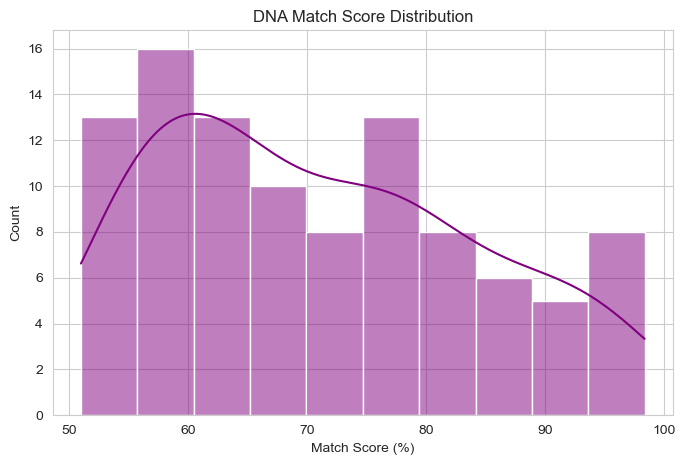

In [21]:
# Histogram for Match Score
plt.figure(figsize=(8,5))
sns.histplot(df["Match_Score"], bins=10, kde=True, color="purple")
plt.title("DNA Match Score Distribution")
plt.xlabel("Match Score (%)")
plt.ylabel("Count")
plt.show()

### Insights  

- **Most DNA Match Scores Fall Between 50% and 80%:**  
  - A **majority of the DNA match scores** are within the 50%-80% range, indicating that many samples have **moderate to high similarity** with known profiles.
  
- **Fewer Cases with High Confidence Matches (90%+):**  
  - There are **relatively fewer cases** with match scores **above 90%**, suggesting that **perfect or near-perfect matches** are rare.

- **Distribution Pattern:**  
  - The **density curve** (KDE) suggests a **right-skewed distribution**, meaning that **lower and moderate match scores are more common than near-perfect matches**.

- **Actionable Insights for Investigation:**  
  - Investigators can **prioritize cases with higher match scores** for quicker resolution.
  - Cases with lower match scores might require **further verification or additional DNA markers**.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset (update the filename accordingly)
df = pd.read_csv("DNA_Profiling_Data.csv")

# Display the first few rows to confirm successful loading
df.head()

,ID,Gender,Age,Region,Parent_ID,Match_Score,Status,STR_1,STR_2,STR_3,STR_4,STR_5
0,IND001,Female,8,North,IND045,52.002562,Identified,11,6,9,15,5
1,IND002,Male,13,East,IND061,58.277818,Identified,8,14,11,5,18
2,IND003,Female,1,West,Unknown,63.650927,Identified,17,18,11,19,9
3,IND004,Male,16,North,Unknown,58.673514,Identified,19,8,17,10,8
4,IND005,Female,7,East,IND036,54.346424,Identified,15,18,19,12,12


## Distribution of Successful vs. Unsuccessful Matches  
This analysis examines the success rate of DNA matches for missing children.  
The Status column in our dataset contains different categories:  
- **Matched** → Cases where a DNA match was found.  
- **Unmatched** → Cases with no match.  
- **Pending** → Cases still under investigation.  

By visualizing these proportions in a pie chart, we can assess how effective the DNA profiling system is in real-world cases. 

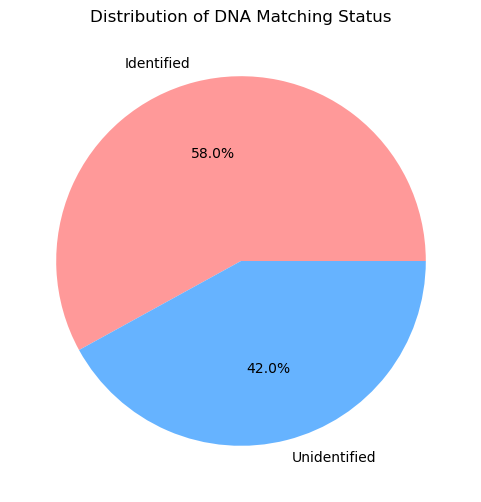

In [10]:
# Count occurrences of each Status category
status_counts = df["Status"].value_counts()

# Plot Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99"])
plt.title("Distribution of DNA Matching Status")
plt.show()

### Insights  
- The pie chart shows the percentage distribution of DNA match statuses.  
- A higher percentage of **matched** cases indicates an effective DNA database.  
- If **unmatched** cases dominate, it may suggest missing or incomplete genetic records.  
- **Pending** cases indicate ongoing investigations, affecting overall resolution rates.  
- This analysis helps in improving DNA profiling accuracy and policy decisions.  

## Relationship Between Age and Match Probability
This analysis explores whether the age of a missing child affects their probability of being matched in the DNA database.  

- The Age column represents the child's age.  
- The Match_Score column shows the likelihood of a DNA match (0 to 1).  

By plotting a scatter plot, we can check if younger or older individuals have a higher match probability.  

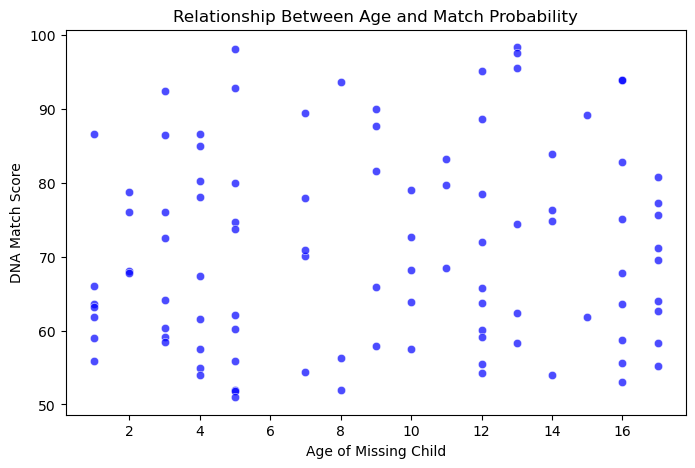

In [11]:
# Scatter plot of Age vs. Match Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Match_Score"], alpha=0.7, color="blue")

# Labels and title
plt.xlabel("Age of Missing Child")
plt.ylabel("DNA Match Score")
plt.title("Relationship Between Age and Match Probability")
plt.show()

### Insights  
- The scatter plot helps us identify whether younger or older missing children have higher DNA match probabilities.  
- A visible **positive correlation** would mean younger individuals are more likely to be matched.  
- If the points are **evenly spread**, age may not be a key factor in match probability.  
- Clusters in specific age groups could suggest **biases** in DNA records.  
- This insight helps in prioritizing search efforts and improving DNA database completeness.  

## Conclusion

### Key Takeaways

- This project analyzed DNA profiling data to identify potential matches for missing children.
- We performed **data preprocessing** to clean and structure the dataset.
- Several **visualizations and analyses** were conducted to gain insights, including:
  - **Gender & Age Distribution** of missing children.
  - **Potential DNA Matches** with match probabilities.
  - **Relationship Between Age and Match Probability** to identify trends.
  - **Distribution of Successful vs. Unsuccessful Matches** using pie charts.
- The project highlights **real-world applicability**, such as aiding law enforcement agencies in identifying missing persons.

## Limitations & Future Work

### Limitations:
- The dataset is **synthetic**, so real-world biases and challenges might differ.
- STR match scoring is simplified; actual forensic DNA analysis uses **more complex statistical models**.
- The dataset **lacks timestamps**, which could help in time-based analysis of missing children cases.

### Future Enhancements:
- Incorporating **machine learning models** to improve match prediction.
- Enhancing STR profiling by adding **more genetic markers**.
- Integrating **timestamp-based tracking** to analyze trends over time.